<a href="https://colab.research.google.com/github/ShKSGithub/Email-Filtering-using-Naive-Bayes/blob/main/Email_Filtering_using_Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cloning Github Repo**

In [82]:
# Cloning the required repository
!git clone https://github.com/ShKSGithub/Email-Filtering-using-Naive-Bayes

fatal: destination path 'Email-Filtering-using-Naive-Bayes' already exists and is not an empty directory.


In [83]:
# Change directory
%cd /content/Email-Filtering-using-Naive-Bayes

/content/Email-Filtering-using-Naive-Bayes


### **Dependencies**

In [84]:
# Import dependencies
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt

### **Read File**

In [85]:
# Read CSV file
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **EDA (Exploratory Data Analysis)**

In [86]:
# Information about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [87]:
# Group Categories and it's description
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

Text(0, 0.5, 'Frequency')

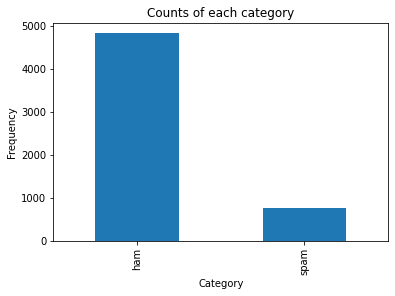

In [88]:
# Group by categories and plotting of bar 
df.groupby(['Category'])['Message'].count().plot.bar(title="Counts of each category")

# Title at x-axis
plt.xlabel('Category')

# Title at y-axis
plt.ylabel('Frequency')


### **Data Preparation**

In [89]:
# Create Column of Spam and place number of 1(spam) or 0(ham)
df['spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [90]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, random_state= 42)

### **Count Vectorizer**

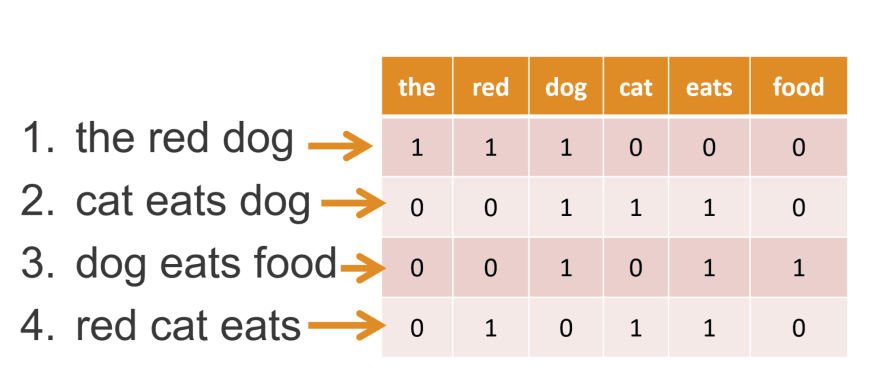

In [91]:
# Count the occurence of each word in a line
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### **Model Fitting**

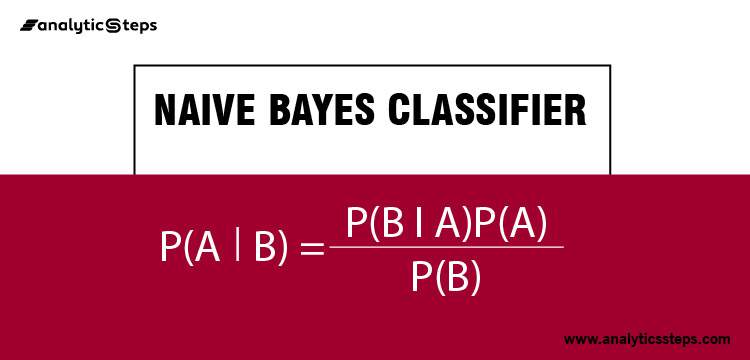

In [92]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### **Model Evaluation**

In [93]:
# Transform the test values to calculate the score
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9885139985642498

### **Prediction (Unseen)**

In [94]:
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_test = v.transform(emails)
model.predict(emails_test)

array([0, 1])

### **Sklearn Pipeline**

In [95]:
# Make a pipeline of classifier
clf = Pipeline([
                ('vectorizer', CountVectorizer()),
                ('nb',MultinomialNB())
              ])

In [96]:
# Model fitting with pipeline
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [97]:
# Calculating score
clf.score(X_test,y_test)

0.9885139985642498

In [98]:
# Emails prediction 
clf.predict(emails)

array([0, 1])

### **Confusion Matrix**

In [99]:
# X_test data first 10 rows
X_test[:10]

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
2973    Sary just need Tim in the bollox &it hurt him ...
2991    Love isn't a decision, it's a feeling. If we c...
2942    My supervisor find 4 me one lor i thk his stud...
230                    Dear good morning now only i am up
1181                           I'm in chennai velachery:)
Name: Message, dtype: object

In [100]:
# Prediction on first 10 rows of X_test data
y_pred = clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1203    4]
 [  12  174]]


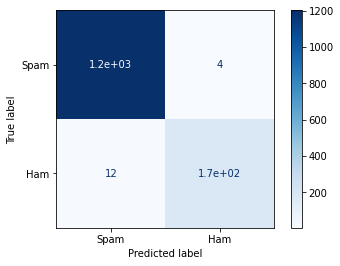

In [102]:
# Confusion Matrix Visualization
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Spam','Ham',], cmap=plt.cm.Blues)

### **Classification Report and Accuracy**

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [80]:
print('Accuracy:\n',accuracy_score(y_test,y_pred))

Accuracy:
 0.9885139985642498


## **Reference:**

### **Stat Quest:** [Naive Bayes, Clearly Explained!!!](https://www.youtube.com/watch?v=O2L2Uv9pdDA)

### **CodeBasics:** [Machine Learning Tutorial Python - 15: Naive Bayes Part 2](https://www.youtube.com/watch?v=nHIUYwN-5rM)

### **Towards DataScience:** [Implementing a Naive Bayes Classifier](https://towardsdatascience.com/implementing-a-naive-bayes-classifier-f206805a95fd)